## K-Means

Leverage K-means to identify anomolies and cluster together the numerical variables. 

In [1]:
# Uncomment to get the correct versions
from IPython.display import clear_output
!pip install -r ../requirements.txt
clear_output() 


In [2]:
import pandas as pd 
import numpy as np 

In [3]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score



In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
RANDOM_SEED = 42 

In [6]:
df_x_train= pd.read_csv('../../data/train_test_split/x_train.csv')
df_y_train = pd.read_csv('../../data/train_test_split/y_train.csv')

df = pd.merge(df_x_train, df_y_train, how='left' )
df.head() 

,Unnamed: 0.1,Unnamed: 0,name,rating,ranking,year,position,height,weight,latitude,longitude,hometown_city,state_province,hometown_country,stars,committed_to,athlete_id,conference,latitude_school,longitude_school,wins_rolling_2year,games_played_rolling_2year,post_season_wins_rolling_2year,point_diff_rolling_2year,win_pct_rolling_2year,distance_miles,side_of_ball,position_group,is_drafted
0,361,361,C.J. Prosise,0.8915,365.0,2012,S,74.0,190.0,35.166812,-80.751458,Woodberry Forest,VA,USA,4,Notre Dame,535958.0,FBS Independents,41.698378,-86.233942,16.0,26.0,1.0,190.0,0.615385,539.828641,defense,d_backfield,1.0
1,14685,14686,Jaylon Haynes,0.8166,1684.0,2017,DT,73.0,290.0,29.312480,-96.098238,Wharton,TX,USA,3,UTSA,4245215.0,American Athletic,29.416983,-98.478814,9.0,25.0,0.0,-118.0,0.360000,143.529399,defense,d_line,0.0
2,15617,15618,Nasser Clark,0.7667,3299.0,2017,RB,70.0,190.0,34.597245,-83.763306,Cleveland,GA,USA,2,Army,NaN,American Athletic,41.387492,-73.964089,10.0,25.0,1.0,62.0,0.400000,709.669019,offense,running_back,0.0
3,3870,3870,Courtney Miggins,0.8111,1568.0,2013,SDE,77.0,240.0,33.712331,-84.105194,Lithonia,GA,USA,3,Louisiana,NaN,Sun Belt,30.215843,-92.041737,18.0,26.0,2.0,128.0,0.692308,523.980272,defense,d_line,0.0
4,20038,20046,Zaylin Wood,0.8383,1429.0,2019,SDE,74.0,262.0,33.537889,-85.253282,Bowdon,GA,USA,3,Middle Tennessee,4428925.0,Conference USA,35.851146,-86.368165,15.0,27.0,1.0,29.0,0.555556,171.919819,defense,d_line,0.0


## Numerical Variables 


In [7]:
df.dtypes

Unnamed: 0.1                        int64
Unnamed: 0                          int64
name                               object
rating                            float64
ranking                           float64
year                                int64
position                           object
height                            float64
weight                            float64
latitude                          float64
longitude                         float64
hometown_city                      object
state_province                     object
hometown_country                   object
stars                               int64
committed_to                       object
athlete_id                        float64
conference                         object
latitude_school                   float64
longitude_school                  float64
wins_rolling_2year                float64
games_played_rolling_2year        float64
post_season_wins_rolling_2year    float64
point_diff_rolling_2year          

In [8]:
# Features
player_info = ['name','athlete_id','latitude', 'longitude', 'latitude_school','longitude_school','committed_to', 'side_of_ball', 'position_group', 'state_province','hometown_city','hometown_country', 'conference','position'] 
# numerical_features=  ['height', 'weight', 'distance_miles']#, 'stars']#, 'win_pct_rolling_2year']
numerical_features=  ['height', 'weight', 'distance_miles', 'stars','win_pct_rolling_2year','rating']


In [9]:
X = df[numerical_features]
y = df[['is_drafted']]

In [10]:
# Preprocess the numerical variables so then all the features are weigthed evenly
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [11]:
X.head() 

,height,weight,distance_miles,stars,win_pct_rolling_2year,rating
0,74.0,190.0,539.828641,4,0.615385,0.8915
1,73.0,290.0,143.529399,3,0.360000,0.8166
2,70.0,190.0,709.669019,2,0.400000,0.7667
3,77.0,240.0,523.980272,3,0.692308,0.8111
4,74.0,262.0,171.919819,3,0.555556,0.8383


### Find the optimal amount of clusters

In [12]:
import time

def find_optimal_amount_of_clusters(K = range(2,10), X_scaled=pd.DataFrame(), verbose=False): 
    # Determine the optimal nunmber of clusters
    
    Sum_of_squared_distances = []
    silhouette_avg = []

    start = time.time()

    for num_clusters in K :
        kmeans = KMeans(n_clusters=num_clusters, random_state=RANDOM_SEED)
        kmeans.fit(X_scaled)
        cluster_labels = kmeans.labels_

        Sum_of_squared_distances.append(kmeans.inertia_)

        silhouette_avg.append(silhouette_score(X_scaled, cluster_labels))

    end = time.time()
    max_index = silhouette_avg.index(max(silhouette_avg))
    max_num_clusters = max_index+2
    print(f'Total Runtime: {end - start}')

    if verbose: 

        # Silhouette Score 
        print(f'Max Silhouette Score: {max(silhouette_avg)}')

        plt.plot(K,silhouette_avg,'bx-')
        plt.xlabel('Values of K') 
        plt.ylabel('Silhouette score') 
        plt.axvline(x=max_num_clusters, color='red', linestyle='--', label='Optimal K')
        plt.title('Silhouette analysis For Optimal k')
        plt.show()

        # Elbow method 
        plt.plot(K,Sum_of_squared_distances,'bx-')
        plt.xlabel('Values of K') 
        plt.ylabel('Sum of squared distances/Inertia') 
        plt.axvline(x=max_num_clusters, color='red', linestyle='--', label='Optimal K')
        plt.title('Elbow Method For Optimal k')
        plt.show()
        
    return max_num_clusters



Total Runtime: 33.0793240070343
Max Silhouette Score: 0.23807763208147845


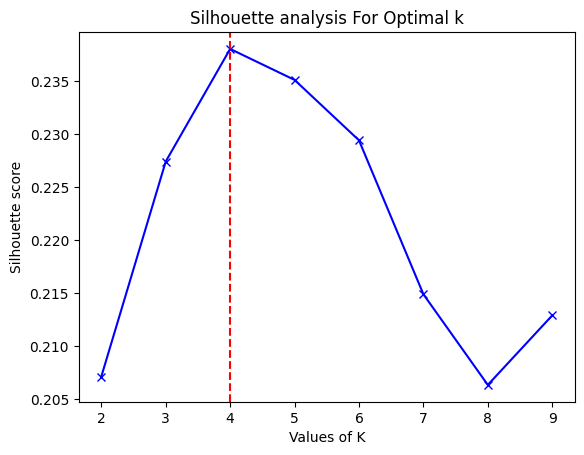

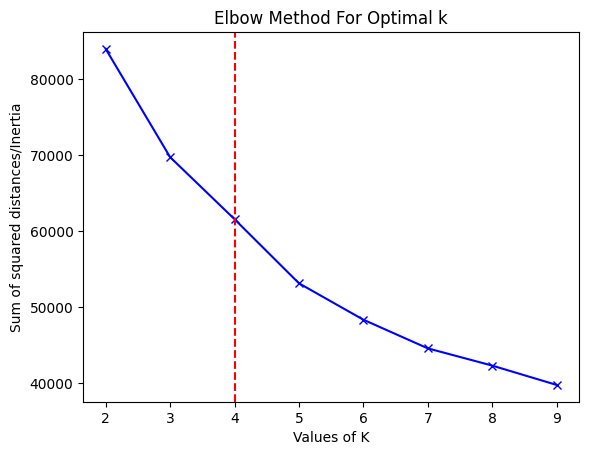

In [13]:
max_num_clusters = find_optimal_amount_of_clusters(K = range(2,10), X_scaled=X_scaled, verbose=True)

In [14]:
print(max_num_clusters)

4


In [15]:
df.head() 

,Unnamed: 0.1,Unnamed: 0,name,rating,ranking,year,position,height,weight,latitude,longitude,hometown_city,state_province,hometown_country,stars,committed_to,athlete_id,conference,latitude_school,longitude_school,wins_rolling_2year,games_played_rolling_2year,post_season_wins_rolling_2year,point_diff_rolling_2year,win_pct_rolling_2year,distance_miles,side_of_ball,position_group,is_drafted
0,361,361,C.J. Prosise,0.8915,365.0,2012,S,74.0,190.0,35.166812,-80.751458,Woodberry Forest,VA,USA,4,Notre Dame,535958.0,FBS Independents,41.698378,-86.233942,16.0,26.0,1.0,190.0,0.615385,539.828641,defense,d_backfield,1.0
1,14685,14686,Jaylon Haynes,0.8166,1684.0,2017,DT,73.0,290.0,29.312480,-96.098238,Wharton,TX,USA,3,UTSA,4245215.0,American Athletic,29.416983,-98.478814,9.0,25.0,0.0,-118.0,0.360000,143.529399,defense,d_line,0.0
2,15617,15618,Nasser Clark,0.7667,3299.0,2017,RB,70.0,190.0,34.597245,-83.763306,Cleveland,GA,USA,2,Army,NaN,American Athletic,41.387492,-73.964089,10.0,25.0,1.0,62.0,0.400000,709.669019,offense,running_back,0.0
3,3870,3870,Courtney Miggins,0.8111,1568.0,2013,SDE,77.0,240.0,33.712331,-84.105194,Lithonia,GA,USA,3,Louisiana,NaN,Sun Belt,30.215843,-92.041737,18.0,26.0,2.0,128.0,0.692308,523.980272,defense,d_line,0.0
4,20038,20046,Zaylin Wood,0.8383,1429.0,2019,SDE,74.0,262.0,33.537889,-85.253282,Bowdon,GA,USA,3,Middle Tennessee,4428925.0,Conference USA,35.851146,-86.368165,15.0,27.0,1.0,29.0,0.555556,171.919819,defense,d_line,0.0


### Optimal Clusters

Based on the silhoutte score and the squared mean error, the optimal amount of clusters is 4. 

In [16]:
# Apply KMeans clustering on the standardized data
# max_num_clusters = find_optimal_amount_of_clusters()
kmeans = KMeans(n_clusters=max_num_clusters, random_state=RANDOM_SEED)
kmeans.fit(X_scaled)


KMeans(n_clusters=4, random_state=42)

In [17]:
# Get the cluster centers and the labels (which cluster each data point belongs to)
centers = kmeans.cluster_centers_
labels = kmeans.labels_

In [18]:
from sklearn.decomposition import PCA
import seaborn as sns 

pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(X_scaled)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
results["kmeans_cluster"] = kmeans.labels_

results.head()

,pca1,pca2,kmeans_cluster
0,1.711940,-1.065945,2
1,-0.099648,0.995426,1
2,-2.273308,-0.994701,0
3,0.535549,1.021672,1
4,0.445652,0.619452,1


In [19]:
# Save the assigned cluster and the pca values to df 
df['k_means_cluster'] = results['kmeans_cluster']
df['k_means_pca1'] = results['pca1']
df['k_means_pca2'] = results['pca2']

In [20]:
df_cluster = df[['name'] + numerical_features+ ['k_means_cluster', 'k_means_pca1', 'k_means_pca2']+ ['is_drafted']]
df_cluster.head() 

,name,height,weight,distance_miles,stars,win_pct_rolling_2year,rating,k_means_cluster,k_means_pca1,k_means_pca2,is_drafted
0,C.J. Prosise,74.0,190.0,539.828641,4,0.615385,0.8915,2,1.711940,-1.065945,1.0
1,Jaylon Haynes,73.0,290.0,143.529399,3,0.360000,0.8166,1,-0.099648,0.995426,0.0
2,Nasser Clark,70.0,190.0,709.669019,2,0.400000,0.7667,0,-2.273308,-0.994701,0.0
3,Courtney Miggins,77.0,240.0,523.980272,3,0.692308,0.8111,1,0.535549,1.021672,0.0
4,Zaylin Wood,74.0,262.0,171.919819,3,0.555556,0.8383,1,0.445652,0.619452,0.0


In [21]:
# Export potential anomoly sortd by distance
df_cluster.to_csv('../../data/k_means_clustering_dataset.csv')


In [22]:
# anomoly_df.head(20) - no values in their left 

# Visualize the clusters 

In [23]:
import analyze_clusters as ac
from standardize_visuals import theme_color_names#, generate_cmap_theme, create_custom_palette


In [24]:
# df_cluster = pd.read_csv('../../data/k_means_clustering_dataset.csv')
# df_cluster.head() 

In [25]:
grouped_df = df_cluster.groupby('k_means_cluster').agg({'name': 'count', 'is_drafted': 'mean'}).reset_index()
grouped_df.rename(columns={'name': 'number_of_players'}, inplace=True)
grouped_df.head() 

,k_means_cluster,number_of_players,is_drafted
0,0,8090,0.059851
1,1,6372,0.061024
2,2,2474,0.251707
3,3,1017,0.069544


k_means_cluster
0    0.450621
1    0.354927
2    0.137804
3    0.056648
Name: proportion, dtype: float64


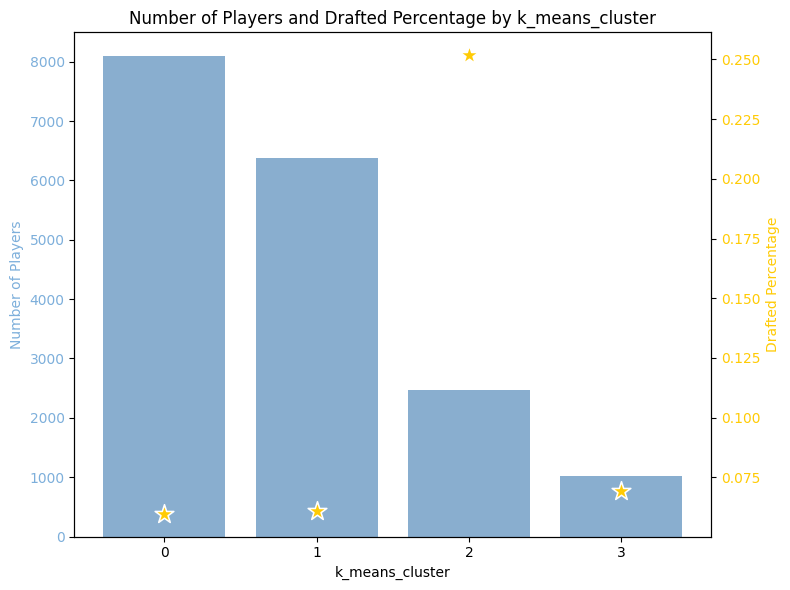

In [26]:
fig, ax1 = plt.subplots(figsize=(8,6))
# sns.countplot(x='k_means_cluster', data=df_cluster, color=theme_color_names['blue'])
sns.barplot(data=grouped_df, x='k_means_cluster', y='number_of_players', color=theme_color_names['light_blue'], ax=ax1)
ax1.set_xlabel('k_means_cluster')
ax1.set_ylabel('Number of Players', color=theme_color_names['light_blue'])
ax1.tick_params(axis='y', labelcolor=theme_color_names['light_blue'])

ax2 = ax1.twinx()

sns.scatterplot(data=grouped_df, x='k_means_cluster',marker='*',s=200, y='is_drafted', color=theme_color_names['maize'], ax=ax2)
ax2.set_ylabel('Drafted Percentage', color=theme_color_names['maize'])
ax2.tick_params(axis='y', labelcolor=theme_color_names['maize'])

print(df_cluster['k_means_cluster'].value_counts(normalize=True) )

# Add title and labels
plt.title('Number of Players and Drafted Percentage by k_means_cluster')
plt.tight_layout()
plt.show()

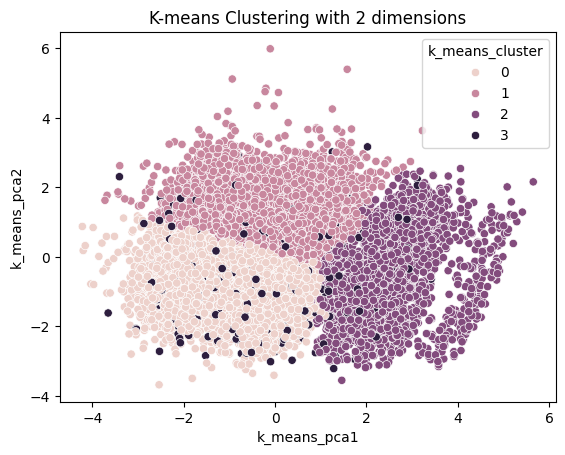

In [27]:
# View the PCA clusters
sns.scatterplot(x="k_means_pca1", y="k_means_pca2", hue=df_cluster['k_means_cluster'], data=df_cluster)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

Numerical features: ['height', 'weight', 'distance_miles', 'stars', 'win_pct_rolling_2year', 'rating']
Numerical Features:


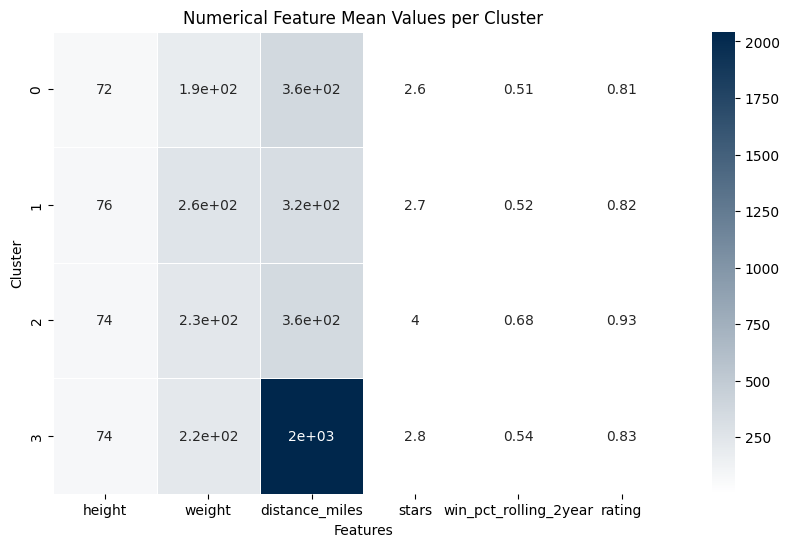

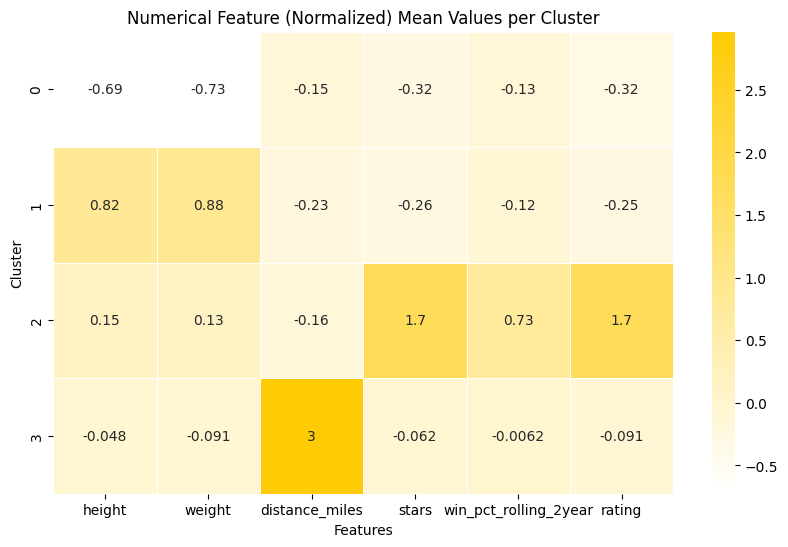

In [28]:
# Visualize the clusters
print(f'Numerical features: {numerical_features}')
features_to_analyze = numerical_features #+ categorical  # Replace with your actual feature names
ac.plot_feature_distribution_per_cluster(df_cluster, features_to_analyze)


### Cluster Descriptions: 

1. Cluster 0 - Smaller Players (Lower weight and shorter height) + lowest ratings/stars
    - 45% of players fall under this (largest cluster)
    - 5.9% drafted
2. Cluster 1 - Taller Players  ( Higher weight and taller height) + lower ratings/stars
    - 35% of players fall under this 
    - 6.1% drafted
3. Cluster 2 - Average Height/Weight + Higher  win percentage + Higher ratings/stars
    - 14% of players fall under this
    - 25.1% drafted
4. Cluster 3 - Travel the furtherest + Average on height, weight, stars, win percentage + rating 
    - 5% of players fall under this (smallest cluster)
    - 6.9% drafted 

### Descriptions of the Clusters
- Cluster 0: "The Underdogs" – Smaller, lower-rated players who make up the largest group but have the lowest draft rate.
- Cluster 1: "The Giants" – Taller, heavier players with lower ratings, forming a significant portion of the players.
- Cluster 2: "The Rising Stars" – Well-rounded, average-sized players with strong performance and the highest chance of being drafted.
- Cluster 3: "The Road Warriors" – Players who travel the furthest, with average attributes. 